In [70]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [71]:
direct_method_files = glob("../another_files/*/*/*/*.csv")
print(len(direct_method_files))
direct_method_files[0]

3062


'../another_files/Punjab/Khanna/Kalal Majra, Khanna - PPCB/Raw_data_15Min_2020_site_1450_Kalal_Majra_Khanna_PPCB_15Min.csv'

In [72]:
indirect_method_files = glob("../files/*.csv")
print(len(indirect_method_files))
indirect_method_files[0]

3048


'../files/2021_site_5124_Urban_Chamarajanagar_KSPCB_15Min.csv'

In [73]:
diff = len(direct_method_files) - len(indirect_method_files)
print(diff)

14


In [74]:
formatted_direct_files = [f[f.index("site_")-5:].replace("__", "_") for f in direct_method_files]
formatted_indirect_files = [f[f.index("site_")-5:].replace("__", "_") for f in indirect_method_files]

set(formatted_indirect_files) - set(formatted_direct_files)

set()

This difference is due to ill formatted file names. Direct method has full coverage of all the files.

In [75]:
print(*(set(formatted_direct_files) - set(formatted_indirect_files)), sep="\n")
print(len(set(formatted_direct_files) - set(formatted_indirect_files)))

2017_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2018_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2018_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2023_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2022_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2021_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2022_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2020_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2021_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2023_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2017_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2019_site_257_PWD_Grounds_Vijayawada_APPCB_15Min.csv
2019_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
2020_site_1405_Nishant_Ganj_Lucknow_UPPCB_15Min.csv
14


In [76]:
pd.Series(formatted_direct_files).value_counts().head(18)

2020_site_1450_Kalal_Majra_Khanna_PPCB_15Min.csv          1
2019_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2018_site_5250_Gole_Bazar_Katni_MPPCB_15Min.csv           1
2021_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2018_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2022_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2019_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2023_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2020_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2017_site_5040_Shrivastav_Colony_Damoh_MPPCB_15Min.csv    1
2023_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2021_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2019_site_5250_Gole_Bazar_Katni_MPPCB_15Min.csv           1
2022_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2020_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2018_site_5661_Maharaj_Bada_Gwalior_MPPCB_15Min.csv       1
2017_site_5661_Maharaj_Bada_Gwalior_MPPC

In [77]:
for file in direct_method_files:
    if "2023_site_5789_Rachnakar_Colony_Aurangabad_MPCB_15Min" in file:
        print(file)

../another_files/Maharashtra/Aurangabad/Rachnakar Colony, Aurangabad - MPCB/Raw_data_15Min_2023_site_5789_Rachnakar_Colony_Aurangabad_MPCB_15Min.csv


## Check statistics

In [78]:
nc_files = glob("../nc_files/*/*/*/*.nc")
print(len(nc_files))
print(nc_files[0])
nc_file_names = list(set([file.split("/")[-1] for file in nc_files]))
print(len(nc_file_names))
nc_file_names[0]

2936
../nc_files/Punjab/Khanna/Kalal Majra, Khanna - PPCB/Raw_data_15Min_2023_site_1450_Kalal_Majra_Khanna_PPCB_15Min.nc
2936


'Raw_data_15Min_2017_site_5341_Sector_30_Faridabad_HSPCB_15Min.nc'

In [79]:
states = [f.split("/")[-4] for f in nc_files]
len(set(states))

31

In [80]:
cities = [f.split("/")[-3] for f in nc_files]
print(len(set(cities)))
cities[0]

279


'Khanna'

In [81]:
stations = [f.split("_")[5] for f in nc_file_names]
print(len(set(stations)))
stations[0]

537


'5341'

2936


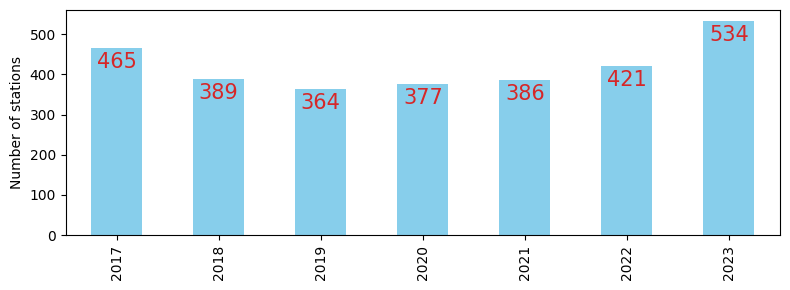

In [82]:
years = [f.split("/")[-1].split("_")[3] for f in nc_file_names]

fig, ax = plt.subplots(figsize=(8,3))
sr = pd.Series(years)
sr.value_counts().sort_index().plot(kind="bar", ax=ax, color='skyblue')
# annotate
for i, v in enumerate(pd.Series(years).value_counts().sort_index()):
    ax.text(i, v-50, str(v), color='tab:red', ha='center', size=15)
    
plt.ylabel("Number of stations")
plt.tight_layout()
print(sr.value_counts().sum())